In [3]:
import sys
sys.path.append("../../src")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load and preprocess data

In [6]:
import data

In [7]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("materials_id", "item_id", "condition_id"))

response_df = raw_df[raw_df.trial_type == "html-slider-response-with-copout"]

Missing datastring for uid debug9X7NKD:debugKJBC0S. Status was 1.
Missing datastring for uid debugCIT0JY:debugOEXFJU. Status was 1.
Missing datastring for uid debug49IEJI:debugSVU9KB. Status was 1.


debug9X7NKD:debugKJBC0S
debugCIT0JY:debugOEXFJU
debug49IEJF:debugSVU9KB
debug49IEJG:debugSVU9KB
debug49IEJI:debugSVU9KB


In [8]:
# Convert condition_id to independent features
response_df["agent_is_topic"], response_df["agent_is_subject"] = \
    zip(*response_df.condition_id)
response_df["agent_is_topic"] = response_df["agent_is_topic"].astype(bool)
response_df["agent_is_subject"] = response_df["agent_is_subject"].astype(bool)

<ipython-input-8-2274e96d65ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df["agent_is_topic"], response_df["agent_is_subject"] = \
<ipython-input-8-2274e96d65ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df["agent_is_topic"] = response_df["agent_is_topic"].astype(bool)
<ipython-input-8-2274e96d65ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.min()) / (xs.max() - xs.min()))

<ipython-input-9-693d361db4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df["slider_value_normed"] = \


In [10]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,materials_id,item_id,condition_id,survey_question_idx,survey_answer,slider_value,slider_copout,agent_is_topic,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,
2,debug49IEJF:debugSVU9KB,0,0,debugSVU9KB,debug49IEJF,debugGB5B3O,html-slider-response-with-copout,2554.7,0.0-2.0,swarm-001-more,17.0,"[0, 0]",<NA>,NaN,62.0,False,False,False,0.631579
3,debug49IEJF:debugSVU9KB,0,0,debugSVU9KB,debug49IEJF,debugGB5B3O,html-slider-response-with-copout,1345.0,0.0-3.0,swarm-001-more,2.0,"[0, 0]",<NA>,NaN,64.0,False,False,False,0.666667
4,debug49IEJF:debugSVU9KB,0,0,debugSVU9KB,debug49IEJF,debugGB5B3O,html-slider-response-with-copout,1286.2,0.0-4.0,swarm-001-more,3.0,"[0, 1]",<NA>,NaN,36.0,False,False,True,0.175439
5,debug49IEJF:debugSVU9KB,0,0,debugSVU9KB,debug49IEJF,debugGB5B3O,html-slider-response-with-copout,2158.8,0.0-5.0,swarm-001-more,5.0,"[0, 0]",<NA>,NaN,83.0,False,False,False,1.000000
6,debug49IEJF:debugSVU9KB,0,0,debugSVU9KB,debug49IEJF,debugGB5B3O,html-slider-response-with-copout,1708.6,0.0-6.0,swarm-001-more,31.0,"[0, 1]",<NA>,NaN,39.0,False,False,True,0.228070


In [12]:
response_df.to_csv("responses.csv")

## Basic visualization

In [13]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = response_df.groupby(["item_id"]).apply(compute_item_difference)

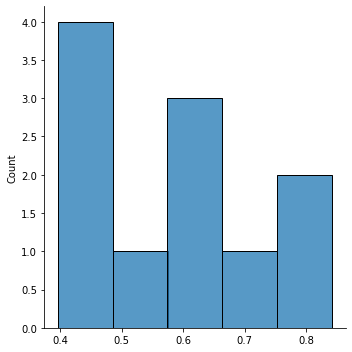

In [14]:
sns.displot(item_differences)